___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

## Data

Let's use Numpy to create a simple sine wave

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x[:50]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [4]:
y[:25]

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691,
       0.84147098, 0.89120736, 0.93203909, 0.96355819, 0.98544973,
       0.99749499, 0.9995736 , 0.99166481, 0.97384763, 0.94630009,
       0.90929743, 0.86320937, 0.8084964 , 0.74570521, 0.67546318])

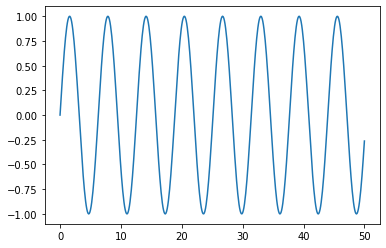

In [5]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

Note! This is very different from our usual split methodology!

In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
len(df)*test_percent

50.1

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [12]:
test_index = int(len(df) - test_point)
test_index

451

In [13]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [14]:
train.tail()

,Sine
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208
45.0,0.850904


In [15]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


## Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

Ignore warning, it's just converting to floats.
We only fit to train data, otherwise we are cheating assuming info about test set.

In [18]:
train.max()

Sine    0.999994
dtype: float64

In [19]:
train.mean()

Sine    0.01146
dtype: float64

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
scaled_train.mean()

0.5057289574261253

In [24]:
# define generator
length = 2
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,
                               batch_size=batch_size)

In [25]:
len(scaled_train)

451

In [26]:
len(generator)

449

In [27]:
# What does the first batch look like?
X,y = generator[0]

In [28]:
print(f"Given the Array: {X.flatten()}")
print(f'Predict this y: {y}')

Given the Array: [0.49999912 0.54991622]
Predict this y: [[0.59933458]]


Let's redefine to get 10 steps back and then predict the next step out. 

In [29]:
length = 10
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length,
                                batch_size=1)

In [30]:
# What does the first batch look like?
X,y = generator[0]

In [31]:
print(f"Given the Array: {X.flatten()}")
print(f'Predict this y: {y}')

Given the Array: [0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: [[0.92073798]]


In [32]:
length = 50
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length,
                               batch_size=1)

Now you will be able to edit the length so that it makes sence for your time series!

## Create the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [34]:
# We're only using one feature in our time series
n_features = 1

In [35]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50, input_shape=(length,n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit_generator(generator,epochs=5,verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 - 9s - loss: 0.0048
Epoch 2/5
401/401 - 8s - loss: 1.9326e-05
Epoch 3/5
401/401 - 8s - loss: 1.7628e-04
Epoch 4/5
401/401 - 8s - loss: 4.1288e-05
Epoch 5/5
401/401 - 8s - loss: 2.6110e-04


In [38]:
model.history.history.keys()

dict_keys(['loss'])

In [39]:
losses = pd.DataFrame(model.history.history)

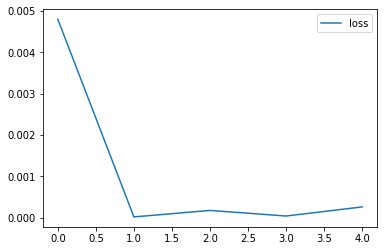

In [40]:
losses.plot()

## Evaluate on Test Data

In [41]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [42]:
scaled_test[:10]

array([[0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856],
       [0.99945317],
       [0.9946174 ],
       [0.98483957],
       [0.97021737],
       [0.95089691]])

In [43]:
len(scaled_test)

50

In [44]:
first_eval_batch = scaled_train[-length:]

In [45]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [46]:
first_eval_batch.shape

(50, 1)

In [47]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [61]:
first_eval_batch[:5]

array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605]])

In [49]:
first_eval_batch.shape

(1, 50, 1)

In [50]:
model.predict(first_eval_batch)

array([[0.95293343]], dtype=float32)

Let's compare the prediction with the actual (it is the first element of test):

In [51]:
scaled_test[0]

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range:

In [52]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [53]:
current_batch.shape

(1, 50, 1)

In [54]:
first_eval_batch.shape

(50, 1)

In [55]:
current_batch[0][:5]

array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605]])

In [56]:
first_eval_batch[:5]

array([[0.83740582],
       [0.7988817 ],
       [0.75737124],
       [0.7132892 ],
       [0.66707605]])

In [59]:
# Now, let's try to append the number 99 to the end of the current
# batch array
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [66]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing 
    # just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [72]:
test_predictions[:10]

[array([0.95293343], dtype=float32),
 array([0.9728841], dtype=float32),
 array([0.98896503], dtype=float32),
 array([1.0000995], dtype=float32),
 array([1.0063337], dtype=float32),
 array([1.0074127], dtype=float32),
 array([1.0038462], dtype=float32),
 array([0.9949922], dtype=float32),
 array([0.9819386], dtype=float32),
 array([0.96317345], dtype=float32)]

In [73]:
scaled_test[:10]

array([[0.94955134],
       [0.96915662],
       [0.98407422],
       [0.99415511],
       [0.99929856],
       [0.99945317],
       [0.9946174 ],
       [0.98483957],
       [0.97021737],
       [0.95089691]])

## Inverse Transformations and Compare

In [74]:
true_predictions = scaler.inverse_transform(test_predictions)

In [83]:
true_predictions[:10]

array([[0.90586136],
       [0.94576242],
       [0.97792399],
       [1.00019282],
       [1.01266106],
       [1.01481897],
       [1.00768602],
       [0.98997822],
       [0.96387123],
       [0.92634123]])

In [84]:
# Ignore warnings
test['Predictions'] = true_predictions

/home/ubuntu/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
test.head(20)

,Sine,Predictions
45.1,0.899097,0.905861
45.2,0.938307,0.945762
45.3,0.968142,0.977924
45.4,0.988304,1.000193
45.5,0.998591,1.012661
45.6,0.998900,1.014819
45.7,0.989229,1.007686
45.8,0.969673,0.989978
45.9,0.940429,0.963871
46.0,0.901788,0.926341


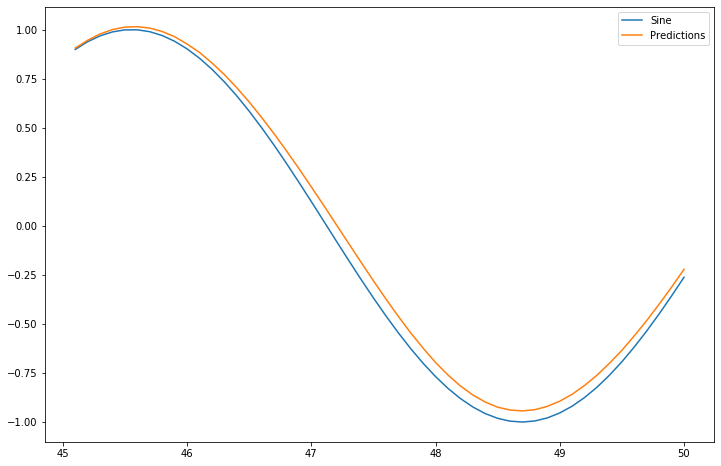

In [87]:
test.plot(figsize=(12,8))